In [1]:
%pylab nbagg

from matplotlib.pyplot import *
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [2]:
grades =[48, 71, 64, 80, 71,
62, 48, 57, 82, 68, 53, 59, 91, 62, 46, 62, 
64, 62, 68, 55, 66, 64, 50, 100, 77, 86, 89, 57, 57, 66,
50, 96, 57, 55, 44, 66, 62, 71, 57, 50, 44]

#### 1 A) 
If there are 42 people in the class, and the 42nd student is a very average student, what
would be a reasonable expectation for the 42nd grade?

In [3]:
def expectation_val( x ):
    'Returns the expectation value of the given array'
    val = ( sum(x) )/(len(x))
    return val

In [12]:
print("It would be resonable for the 42nd grade \
to be {:.2f}".format(expectation_val(grades)))

It would be resonable for the 42nd grade to be 64.32


#### 1 B) 
Calculate the standard deviation for the grades.

In [5]:
def stand_dev( x ):
    ' Returns the standard deviation of the given array'
    x = array(x)
    xsqr = x**2
    dev = sqrt( expectation_val(xsqr) -  (expectation_val(x))**2 )
    return dev

In [6]:
print('The standard deviation of the grades \
is {:.3f}'.format(stand_dev(grades)))

The standard deviation of the grades is 13.873


#### 1 C)
Construct a histogram of the grades with bin sizes of 5 and use a weighted mean method
to calculate the expectation value for the histogrammed grades. Compare to your previous
result. Justify what you think is a reasonable maximum value the exact expectation value
and the histogrammed expectation value could differ by.

In [7]:
def weighted_expec( bins , prob ):
    val = sum( bins*prob )
    return val 

The weighted expectation value is 64.20


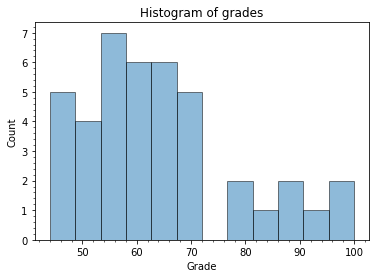

In [11]:
#-------- Building the histogram
close(1);figure(1)
binsize =  5
numbin = math.ceil(( max(grades)-min(grades))/(binsize)) 
his = hist(grades,bins=numbin,alpha=0.5,edgecolor='black')
xlabel('Grade');ylabel('Count')
title('Histogram of grades')
minorticks_on()

#-------- From the histogram
counts = his[0]
bin_edge = his[1]

#--------
bin_mid = (bin_edge[1:] + bin_edge[:-1])/2 
prob_bin = counts/len(grades) 
#len(grades) is equivalent to the total number of counts


print('The weighted expectation value \
is {:.2f}'.format( weighted_expec(bin_mid,prob_bin) ))

The weighted expectation value (64.20) is slightly lower than the other expectation value (64.32), but they are very similar especially when considering rounding. 

The weighted expectation value is influenced by the number of bins, and therefore the width of the bins.
Each bin has a width of values it contains (for this question the width was fixed at 5). 

Any given value need only to fall within this width (range of values) to be added to that bins count number.


We used the middle of the bins to calculate the expectation value.
If we use the left edge, right edge, or any other grade value in the bin the resulting expectation value will be different. 

So the grade number could vary by up to 2.5 on either side of the middle of the bin, which means the resulting expectation value could vary up to +/- 2.5 from the value calculated using the middle of the bins.


Fixing the width at 5, I would not expect the exact expectation value to differ from the histogrammed value by more than 2.5.